<a href="https://colab.research.google.com/github/zuryeong519/Credit-rating-model/blob/main/%EC%8B%A0%EC%9A%A9%ED%8F%89%EA%B0%80%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습목표
- 인공지능 모델을 만들기 전에 과제를 어떻게 정의하는지 알 수 있다.
- 타인의 정의된 과제를 살펴보고 필요한 추가 정보가 무엇인지 생각하는 과정을 이해한다.
- 다양한 신용평가모형 생성 방법 중 인공지능 모델링으로 생성하는 방법을 알 수 있다.
- 정형 데이터의 다양한 데이터 전처리를 할 수 있다.
- 다중 클래스 분류를 이해하고 평가하는 방법을 이해할 수 있다.

# 과제 정의

- 많은 금융회사에서는 신규 대출 및 계좌개설, 연장 대출 등의 업무가 발생한다.
- 비단 (주)MK저축은행도 다르지 않다.
- 올해 (주)MK저축은행은 이러한 고객의 요구결과를 처리하는 프로세스 중 승인과정을 개선하고자 한다.
- 보다 안정적이고 빠른 방법을 고민하여 고객의 신용점수 등급에 따라 자동승인을 기획하였다.
- 우리는 개인의 신용 관련 정보를 바탕으로 신용 점수를 분류할 수 있는 기계 학습 모델을 구축한다.
- 그럼으로 수작업을 줄이고, 줄어든 수작업에 수반되었던 인력은 보다 생산적인 일을 하게 될 것이다.

# 데이터 세트

- 데이터 세트명 : 신용점수 분류
- 데이터 세트 출처 : https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data

# 데이터 세트 상세 설명

- 데이터는 100,000건이며, 총 28개의 컬럼으로 구성됨
- Credit_Score 컬럼이 예측을 해야하는 신용등급 분류 값이다.

- ID: 각 행 식별자
- Customer_ID: 고객 식별자
- Month: 데이터 생성 달
- Name: 고객명
- Age: 연령
- SSN: 식별번호(주민번호, 사회보장번호 등)
- Occupation: 직업
- Annual_Income: 연간 소득
- Monthly_Inhand_Salary: 공제 후 월급
- Num_Bank_Accounts: 보유한 은행 계좌 수
- Num_Credit_Card: 보유한 신용 카드 수
- Interest_Rate: 대출이나 신용카드 등 금융상품과 관련된 이자율
- Num_of_Loan: 대출 수
- Type_of_Loan: 대출 유형
- Delay_from_due_date: 지연 지불된 일수
- Num_of_Delayed_Payment: 결제 지연 횟수
- Changed_Credit_Limit: 신용 한도 변경 평균 잔여일
- Num_Credit_Inquiries: 신용 조회 수
- Credit_Mix: 신용계좌의 구성 상태
- Outstanding_Debt: 미결제 부채 금액
- Credit_Utilization_Ratio: 총 사용 가능한 대출잔액에 사용된 대출액의 비율
- Credit_History_Age: 신용 기록 연령
- Payment_of_Min_Amount: 신용카드나 대출에 대한 최소 결제 금액을 처리하는 방법
- Total_EMI_per_month: 지불한 총 균등할부(EMI, Equal Monthly Installment) 결제 금액
- Amount_invested_monthly: 월 단위 투자 금액
- Payment_Behaviour: 지불 능력
- Monthly_Balance: 금융계좌의 월별 잔액
- Credit_Score: 신용 등급

# 모델의 성능 지표 (Metric) : f1_score
- 정밀도 : 모델이 1 이라고 예측한 것 중에 실제로 1인 것 = TP / (TP+FP)
- 재현율 : 실제로 1 인 것 중에 모델이 1로 예측한 것 = TP / (TP+FN)
- 조화평균 : 정밀도(Precision)와 재현율(Recall)의 조화평균 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
- 일반적으로 다중클래스 문제에서 사용

- 계산 예제
  - y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 실제 값
  - y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0] # 예측 값
  - 정밀도 : 0.75
  - 재현율 : 0.6
  - f1_score(y_true, y_pred) : 0.6666666666666665

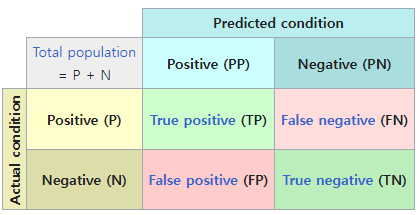

<font size=2> [ 출처 : https://en.wikipedia.org/wiki/Confusion_matrix ]</font>

In [ ]:
# 계산 예제 실행 코드
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 실제 값
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0] # 예측 값
from sklearn.metrics import precision_score, recall_score, f1_score

# sklearn 에서 제공하는 함수를 이용하여 계산 : 정밀도(TP/(TP+FP))
print('정밀도 :', precision_score(y_true, y_pred), 3/(3+1))

# sklearn 에서 제공하는 함수를 이용하여 계산 : 재현율(TP/(TP+FN))
print('재현율 :', recall_score(y_true, y_pred), 3/(3+2))

# sklearn 에서 제공하는 함수를 이용하여 계산 : f1 score (2 * (정밀도 * 재현율) / (정밀도 + 재현율)))
print('f1 score :', f1_score(y_true, y_pred), 2 * (0.75 * 0.6)/(0.75 + 0.6))


정밀도 : 0.75 0.75
재현율 : 0.6 0.6
f1 score : 0.6666666666666666 0.6666666666666665


In [ ]:
# 평가 함수 정의
from sklearn.metrics import precision_score, recall_score, f1_score
def my_evaluate(y_true, y_pred):
    p = precision_score(y_true, y_pred) # 정밀도
    r = recall_score(y_true, y_pred) # 재현율
    f = f1_score(y_true, y_pred) # f1 score
    return p, r, f  # 3개의 평가결과를 리턴

# 극단적인 몇 가지 조건에서 평가함수를 이해
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 실제 값
y_pred = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 예측 값
p, r, f = my_evaluate(y_true, y_pred)
print('모두 맞았을 때 : ', p, r, f)

y_true = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] # 실제 값
y_pred = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 예측 값
p, r, f = my_evaluate(y_true, y_pred)
print('모두 틀렸을 때 : ', p, r, f)

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 실제 값
y_pred = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1] # 예측 값
p, r, f = my_evaluate(y_true, y_pred)
print('실제 값에서 1을 반만 맞았을 때 : ', p, r, f)

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 실제 값
y_pred = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # 예측 값
p, r, f = my_evaluate(y_true, y_pred)
print('실제 값에서 0을 반만 맞았을 때 : ', p, r, f)

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 실제 값
y_pred = [0, 0, 0, 1, 1, 0, 0, 1, 1, 1] # 예측 값
p, r, f = my_evaluate(y_true, y_pred)
print('실제 값에서 1을 반, 0을 반만 맞았을 때 : ', p, r, f)

print('결론 : 실제값에서 1은 관심의 대상이기 때문에 0보다 많이 맞추는 것이 중요하다.')

모두 맞았을 때 :  1.0 1.0 1.0
모두 틀렸을 때 :  0.0 0.0 0.0
실제 값에서 1을 반만 맞았을 때 :  1.0 0.6 0.75
실제 값에서 0을 반만 맞았을 때 :  0.7142857142857143 1.0 0.8333333333333334
실제 값에서 1을 반, 0을 반만 맞았을 때 :  0.6 0.6 0.6
결론 : 실제값에서 1은 관심의 대상이기 때문에 0보다 많이 맞추는 것이 중요하다.


In [ ]:
# 필수 패키지 로드
import gdown
import pandas as pd
import numpy as np
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb


In [ ]:
# 파일 다운로드
google_path = 'https://drive.google.com/uc?id='
file_id = '1j0qGYojlW9cgRghZZUv4gWLBFjR8W8nG'
output_name = 'train.csv'
gdown.download(google_path+file_id, output_name)

Downloading...
From: https://drive.google.com/uc?id=1j0qGYojlW9cgRghZZUv4gWLBFjR8W8nG
To: /content/train.csv
100%|██████████| 31.1M/31.1M [00:00<00:00, 97.1MB/s]


'train.csv'

In [ ]:
# 파일을 불러오기
train = pd.read_csv('train.csv')

In [ ]:
# 데이터 미리보기
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
# 결측치 확인
train.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [ ]:
# 결측치가 있는 컬럼 모두 삭제
target_drop_columns = ['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment',
                       'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']
train_drop = train.drop(columns=target_drop_columns)


  - 결측치 데이터는 삭제할 수 있지만, 수치형의 경우 0으로 치환하여 분석할 수도 있다.

In [ ]:
train_zero = train.fillna(0)  # 결측치를 0으로 치환
train_zero.shape # 데이터 갯수와 컬럼 갯수 확인

# 이후 셀에서 결측치가 0으로 치환된 데이터를 사용하도록 처리
train_drop = train_zero.copy()  # train_zero 데이터프레임을 복사하여 train_drop 객체에 할당

In [ ]:
# 미리보기
train_drop

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,31.944960,0,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
# 중복체크
train_drop.duplicated().sum()

0

# 데이터 구조 파악

In [ ]:
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
# 기초 통계량 확인
train_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,100000.0,3564.961339,3295.207286,0.0,1183.864167,2623.714167,5371.525000,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.0,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.0,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.0,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.0,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,100000.0,27.208880,191.308723,0.0,3.000000,5.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.0,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.0,30.306660,69.249473,161.224249,82331.000000


# 탐색적 자료 분석 (EDA, Exploratory Data Analysis)

In [ ]:
# 직업별 데이터 수 확인
train_drop['Occupation'].value_counts(), train_drop.Occupation.nunique()

(Occupation
 _______          7062
 Lawyer           6575
 Architect        6355
 Engineer         6350
 Scientist        6299
 Mechanic         6291
 Accountant       6271
 Developer        6235
 Media_Manager    6232
 Teacher          6215
 Entrepreneur     6174
 Doctor           6087
 Journalist       6085
 Manager          5973
 Musician         5911
 Writer           5885
 Name: count, dtype: int64,
 16)

In [ ]:
# Unknown으로 처리하는 경우
train_drop['Occupation'] = train_drop['Occupation'].replace('_______', 'Unknown')

In [ ]:
# 삭제 처리하는 경우
target_index = train_drop[train_drop['Occupation'] == '_______'].index  # 직업 컬럼의 데이터에 "_______"가 있는 행 번호(인덱스) 검색
train_drop = train_drop.drop(target_index) # 검색된 행을 삭제

In [ ]:
# 신용등급별 지불한 총 균등할부(EMI, Equal Monthly Installment) 결제 평균금액 확인
train_drop.groupby('Credit_Score')['Total_EMI_per_month'].mean().reset_index()


,Credit_Score,Total_EMI_per_month
0,Good,1477.199494
1,Poor,1363.931423
2,Standard,1399.650688


In [ ]:
# 신용등급별 보유 카드수별 총 사용 가능한 대출잔액에 사용된 대출액의 최대 비율
train_drop.pivot_table(index='Num_Credit_Card', columns='Credit_Score', values='Credit_Utilization_Ratio', aggfunc='max')

Credit_Score,Good,Poor,Standard
Num_Credit_Card,,,
0,42.515861,NaN,41.498049
1,49.522324,43.371161,46.771267
2,46.745141,45.214930,46.081956
3,48.176599,46.127096,47.092781
4,47.642425,46.579034,47.023191
...,...,...,...
1495,NaN,NaN,26.145525
1496,NaN,NaN,40.601804
1497,30.958888,NaN,38.086455


In [ ]:
# 보유카드수별 건수
train_drop['Num_Credit_Card'].value_counts().head(10)

,count
Num_Credit_Card,
5,18459
7,16615
6,16559
4,14030
3,13277
8,4956
10,4860
9,4643
2,2149


In [ ]:
# 보유카드 수 정규화 처리
train_drop['Num_Credit_Card'] = (train_drop['Num_Credit_Card'] - train_drop['Num_Credit_Card'].mean()) / train_drop['Num_Credit_Card'].std()
train_drop['Num_Credit_Card'].value_counts().head(10)

,count
Num_Credit_Card,
-0.135400,18459
-0.119903,16615
-0.127652,16559
-0.143149,14030
-0.150897,13277
-0.112155,4956
-0.096658,4860
-0.104406,4643
-0.158646,2149


In [ ]:
# 연간 수입액 데이터 확인 : 특수문자
train_drop['Annual_Income']

,Annual_Income
0,19114.12
1,19114.12
2,19114.12
3,19114.12
4,19114.12
...,...
99995,39628.99
99996,39628.99
99997,39628.99
99998,39628.99


In [ ]:
# 연간 수입액 특수문자 제거
train_drop['Annual_Income'] = train_drop['Annual_Income'].apply(lambda x: x.replace('_', ''))
train_drop['Annual_Income'] = train_drop['Annual_Income'].astype(float)

In [ ]:
# 나이 특수문자 제거
train_drop['Age'] = train_drop['Age'].apply(lambda x : str(x).replace('_', ''))
train_drop['Age'] = train_drop['Age'].astype(int)

In [ ]:
# 대출건수 특수문자 제거
train_drop['Num_of_Loan'] = train_drop['Num_of_Loan'].apply(lambda x : x.replace('_', ''))
train_drop['Num_of_Loan'] = train_drop['Num_of_Loan'].astype(int)

In [ ]:
# 미결제 부채 금액 특수문자 제거
train_drop['Outstanding_Debt'] = train_drop['Outstanding_Debt'].apply(lambda x : x.replace('_', ''))
train_drop['Outstanding_Debt'] = train_drop['Outstanding_Debt'].astype(float)

In [ ]:
# 특정 컬럼의 데이터에 "_"가 포함되었는지 모든 컬럼을 대상으로 조사할 필요가 있을 수 있다.
is_include = []
for col in train_drop.columns:  # 모든 컬럼을 대상으로 반복 처리
    if '_' in train_drop[col].values: # 특정 컬럼의 값들 중에 "_"를 포함하는 경우라면,
        is_include.append(col)  # 해당 컬럼을 is_include 리스트 자료형에 추가

print(is_include) # 결과 출력

# 발견된 2개 컬럼에 대해 위와 같은 방법으로 replace 처리
train_drop['Changed_Credit_Limit'] = train_drop['Changed_Credit_Limit'].apply(lambda x : x.replace('_', ''))
train_drop['Credit_Mix'] = train_drop['Credit_Mix'].apply(lambda x : x.replace('_', ''))


['Changed_Credit_Limit', 'Credit_Mix']


In [ ]:
# 통계정보 다시 확인
train_drop.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,110.649700,1.764157e+05,3564.961339,17.091280,-1.840306e-17,72.466040,3.009960,21.068780,27.208880,1426.220376,32.285173,1403.118217
std,686.244717,1.429618e+06,3295.207286,117.404834,1.000000e+00,466.422621,62.647879,14.860104,191.308723,1155.129026,5.116875,8306.041270
min,-500.000000,7.005930e+03,0.000000,-1.000000,-1.741429e-01,1.000000,-100.000000,-5.000000,0.000000,0.230000,20.000000,0.000000
25%,24.000000,1.945750e+04,1183.864167,3.000000,-1.431489e-01,8.000000,1.000000,10.000000,3.000000,566.072500,28.052567,30.306660
50%,33.000000,3.757861e+04,2623.714167,6.000000,-1.354004e-01,13.000000,3.000000,18.000000,5.000000,1166.155000,32.305784,69.249473
75%,42.000000,7.279092e+04,5371.525000,7.000000,-1.199035e-01,20.000000,5.000000,28.000000,9.000000,1945.962500,36.496663,161.224249
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1.144084e+01,5797.000000,1496.000000,67.000000,2597.000000,4998.070000,50.000000,82331.000000


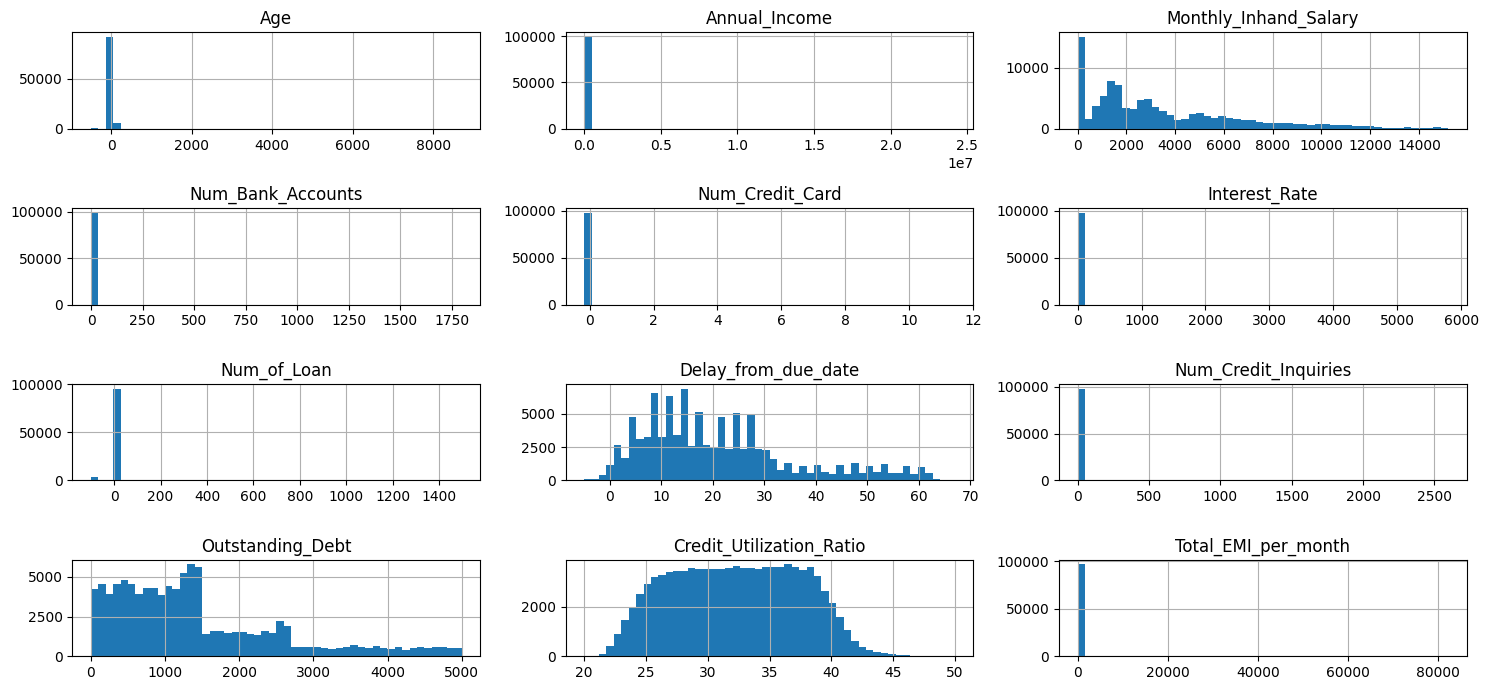

In [ ]:
# 각 수치형 변수 히스토그램
train_drop.hist(bins=50, figsize=(15, 7))
plt.tight_layout()
plt.show()

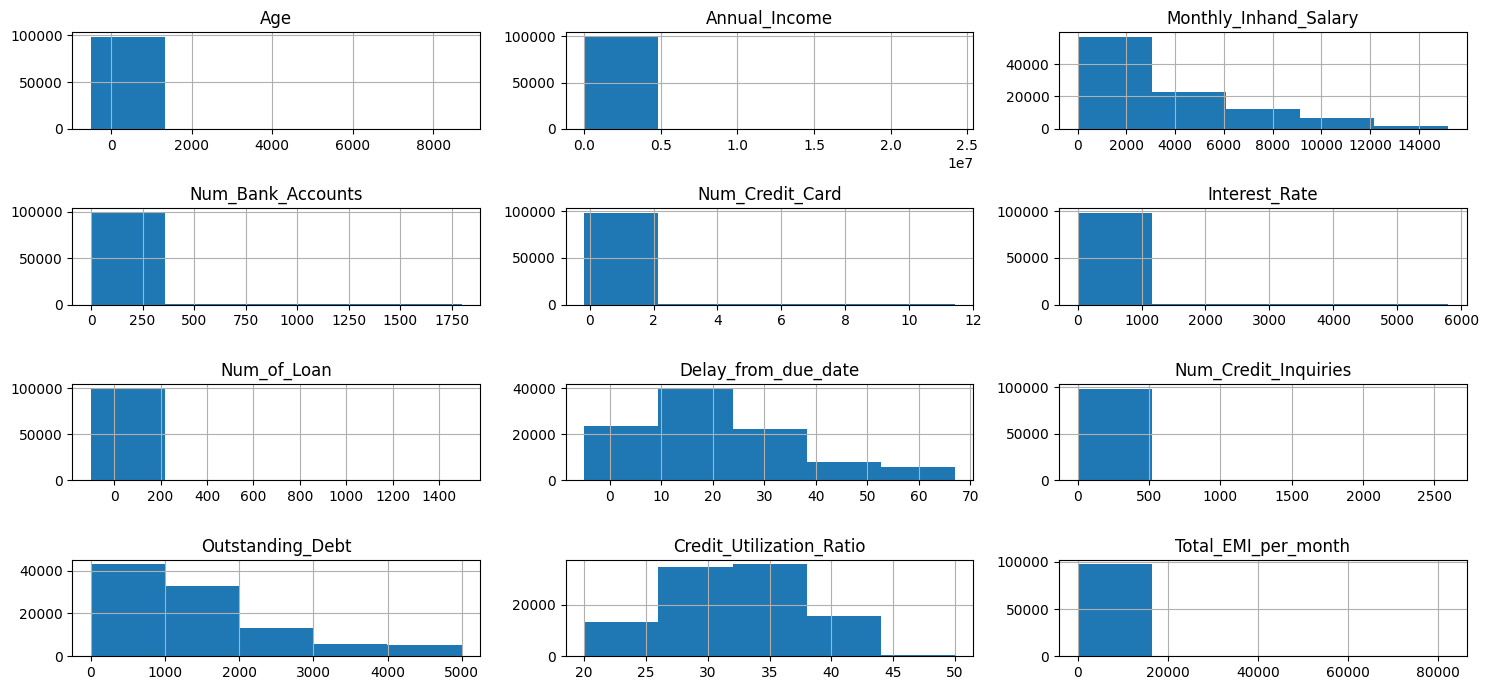

In [ ]:
# bins 를 5로 한 경우
train_drop.hist(bins=5, figsize=(15, 7))
plt.tight_layout()
plt.show()

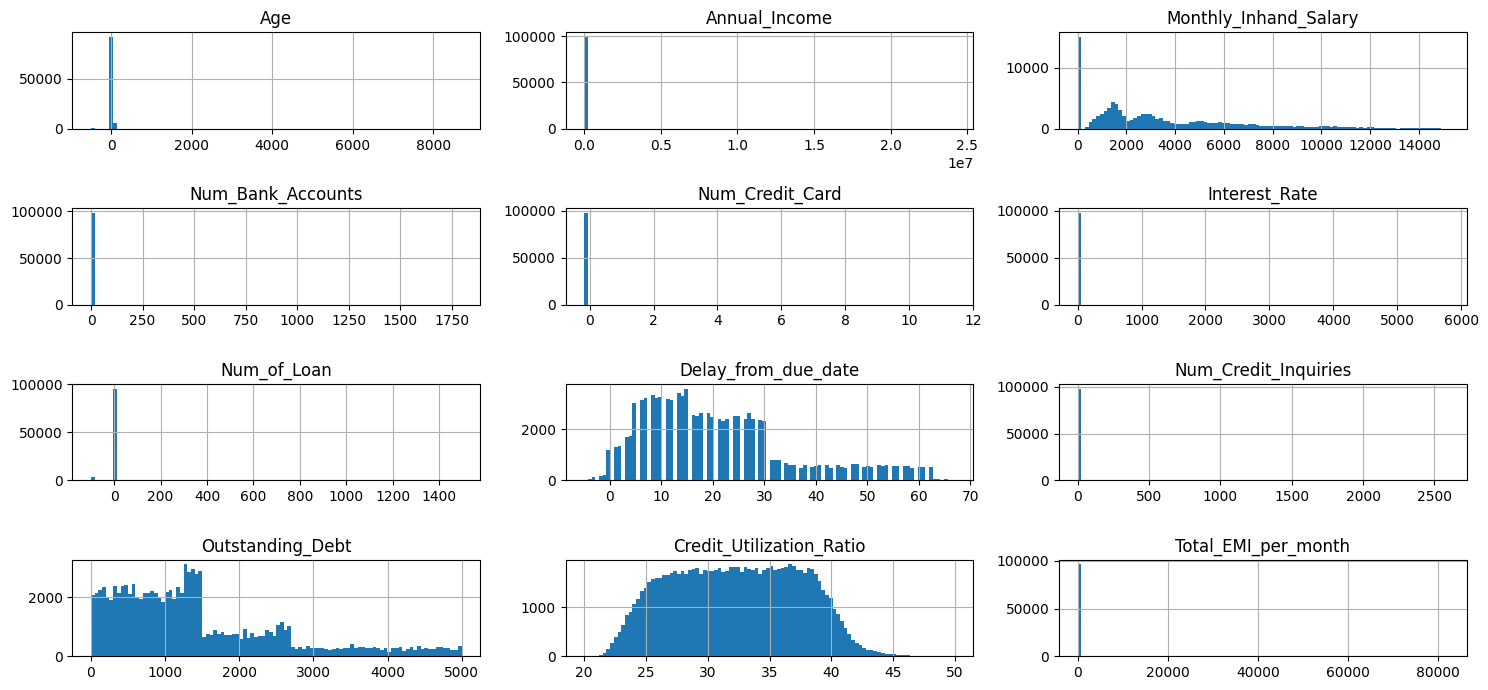

In [ ]:
# bins 를 100으로 한 경우
train_drop.hist(bins=100, figsize=(15, 7))
plt.tight_layout()
plt.show()

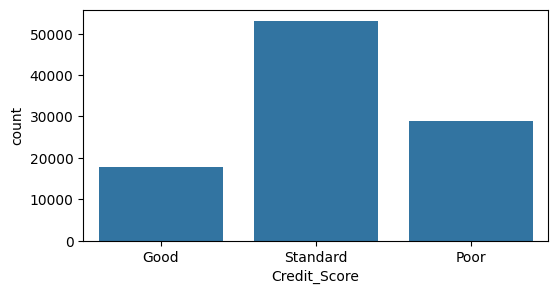

In [ ]:
# 예측 대상 데이터인 Label 의 분포를 살펴보기 위한 시각화
# 신용등급별 건수
plt.figure(figsize=(6, 3))
sns.countplot(x=train_drop['Credit_Score'])
plt.show()

  - 범주형 컬럼을 조사한 후 각 컬럼의 plot을 그려 볼 수 있다.
  - 여기서는 예제로 1개만 그려보겠다.

범주형 컬럼들 : Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


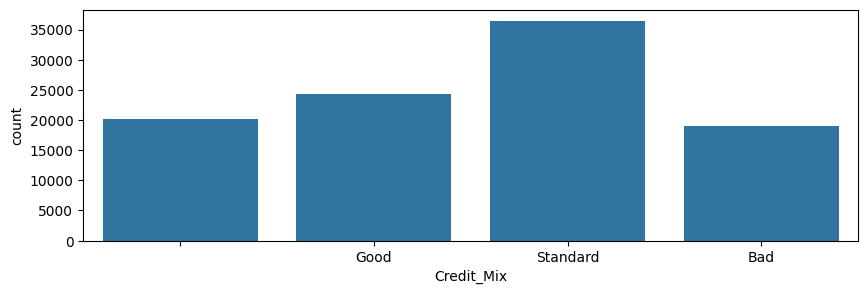

In [ ]:
# 범주형 컬럼을 조회
print('범주형 컬럼들 :', train_drop.select_dtypes('object').columns)

# 범주형 컬럼 중에 'Credit_Mix' 컬럼을 이용하여 countplot 생성
plt.figure(figsize=(10, 3))
sns.countplot(x=train_drop['Credit_Mix'])
plt.show()

In [ ]:
# 데이터 구조 확인
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
# 범주형 데이터 수치형 변환
le = LabelEncoder()

train_drop['ID'] = le.fit_transform(train_drop['ID'])
train_drop['Customer_ID'] = le.fit_transform(train_drop['Customer_ID'])
train_drop['Month'] = le.fit_transform(train_drop['Month'])
train_drop['SSN'] = le.fit_transform(train_drop['SSN'])
train_drop['Occupation'] = le.fit_transform(train_drop['Occupation'])
train_drop['Changed_Credit_Limit'] = le.fit_transform(train_drop['Changed_Credit_Limit'])
train_drop['Credit_Mix'] = le.fit_transform(train_drop['Credit_Mix'])
train_drop['Payment_of_Min_Amount'] = le.fit_transform(train_drop['Payment_of_Min_Amount'])
train_drop['Payment_Behaviour'] = le.fit_transform(train_drop['Payment_Behaviour'])
train_drop['Credit_Score'] = le.fit_transform(train_drop['Credit_Score'])

train_drop['Name'] = train_drop['Name'].astype(str)
train_drop['Name'] = le.fit_transform(train_drop['Name'])
train_drop['Type_of_Loan'] = train_drop['Type_of_Loan'].astype(str)
train_drop['Type_of_Loan'] = le.fit_transform(train_drop['Type_of_Loan'])
train_drop['Num_of_Delayed_Payment'] = train_drop['Num_of_Delayed_Payment'].astype(str)
train_drop['Num_of_Delayed_Payment'] = le.fit_transform(train_drop['Num_of_Delayed_Payment'])
train_drop['Credit_History_Age'] = train_drop['Credit_History_Age'].astype(str)
train_drop['Credit_History_Age'] = le.fit_transform(train_drop['Credit_History_Age'])
train_drop['Amount_invested_monthly'] = train_drop['Amount_invested_monthly'].astype(str)
train_drop['Amount_invested_monthly'] = le.fit_transform(train_drop['Amount_invested_monthly'])
train_drop['Monthly_Balance'] = train_drop['Monthly_Balance'].astype(str)
train_drop['Monthly_Balance'] = le.fit_transform(train_drop['Monthly_Balance'])

In [ ]:
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  int64  
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  int64  
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  in

In [ ]:
train_drop

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,16406,12320,3,85,23,10205,12,19114.12,1824.843333,3,...,0,809.98,26.822620,181,1,49.574949,81514,3,42381,0
1,16417,12320,2,85,23,10205,12,19114.12,0.000000,3,...,2,809.98,31.944960,0,1,49.574949,7662,4,31504,0
2,16428,12320,6,85,-500,10205,12,19114.12,0.000000,3,...,2,809.98,28.609352,185,1,49.574949,82227,5,48640,0
3,16441,12320,0,85,23,10205,12,19114.12,0.000000,3,...,2,809.98,31.377862,186,1,49.574949,30359,6,11594,0
4,16452,12320,7,85,23,10205,12,19114.12,1824.843333,3,...,2,809.98,24.797347,187,1,49.574949,55364,2,51835,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62788,8833,0,6529,25,1009,9,39628.99,3359.415833,4,...,0,502.38,34.663572,308,1,35.104023,69765,1,76393,1
99996,62789,8833,7,6529,25,1009,9,39628.99,3359.415833,4,...,0,502.38,40.565631,309,1,35.104023,65283,2,78094,1
99997,62790,8833,5,6529,25,1009,9,39628.99,3359.415833,4,...,2,502.38,41.255522,310,1,35.104023,37144,1,79794,1
99998,62791,8833,4,6529,25,1009,9,39628.99,3359.415833,4,...,2,502.38,33.638208,311,1,35.104023,39062,4,44643,2


# 학습 데이터, 검증 데이터 분리

In [ ]:
train_data = train_drop[:-100]
valid_data = train_drop[-100:]

train_data.shape, valid_data.shape

((99900, 28), (100, 28))


  - 모형(모델)의 일반화를 위한 다양한 기법이 있으나,
  - 여기서는 수작업으로 일반화를 확인하는 것이다.
  - 100개가 아닌 20개, 50개, 200 등의 갯수로 모델을 생성하고 평가점수를 확인해 보겠다.

In [ ]:
train_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,16406,12320,3,85,23,10205,12,19114.12,1824.843333,3,...,0,809.98,26.822620,181,1,49.574949,81514,3,42381,0
1,16417,12320,2,85,23,10205,12,19114.12,0.000000,3,...,2,809.98,31.944960,0,1,49.574949,7662,4,31504,0
2,16428,12320,6,85,-500,10205,12,19114.12,0.000000,3,...,2,809.98,28.609352,185,1,49.574949,82227,5,48640,0
3,16441,12320,0,85,23,10205,12,19114.12,0.000000,3,...,2,809.98,31.377862,186,1,49.574949,30359,6,11594,0
4,16452,12320,7,85,23,10205,12,19114.12,1824.843333,3,...,2,809.98,24.797347,187,1,49.574949,55364,2,51835,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99895,62683,8125,1,4878,39,226,8,85744.12,7125.343333,6,...,3,717.79,40.554978,86,2,72.099176,65133,4,59745,0
99896,62684,3754,3,1476,33,12142,5,41329.56,3421.130000,2,...,2,1245.01,34.524558,197,1,20.553577,15880,3,71505,0
99897,62685,3754,2,1476,33,12142,5,41329.56,3421.130000,2,...,2,1245.01,25.855366,198,1,20.553577,26520,3,65187,0
99898,62686,3754,6,1476,33,12142,5,41329.56,3421.130000,2,...,2,1245.01,39.362114,199,0,20.553577,69455,1,78526,0


In [ ]:
# 학습용 데이터 준비
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

x_train.shape, y_train.shape

((99900, 27), (99900,))

In [ ]:
# 검증용 데이터 준비
x_valid = valid_data.iloc[:, :-1]
y_valid = valid_data.iloc[:, -1]

x_valid.shape, y_valid.shape

((100, 27), (100,))

# 데이터 스케일링

In [ ]:
x_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,16406,12320,3,85,23,10205,12,19114.12,1824.843333,3,...,4.0,0,809.98,26.822620,181,1,49.574949,81514,3,42381
1,16417,12320,2,85,23,10205,12,19114.12,0.000000,3,...,4.0,2,809.98,31.944960,0,1,49.574949,7662,4,31504
2,16428,12320,6,85,-500,10205,12,19114.12,0.000000,3,...,4.0,2,809.98,28.609352,185,1,49.574949,82227,5,48640
3,16441,12320,0,85,23,10205,12,19114.12,0.000000,3,...,4.0,2,809.98,31.377862,186,1,49.574949,30359,6,11594
4,16452,12320,7,85,23,10205,12,19114.12,1824.843333,3,...,4.0,2,809.98,24.797347,187,1,49.574949,55364,2,51835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99895,62683,8125,1,4878,39,226,8,85744.12,7125.343333,6,...,5.0,3,717.79,40.554978,86,2,72.099176,65133,4,59745
99896,62684,3754,3,1476,33,12142,5,41329.56,3421.130000,2,...,2.0,2,1245.01,34.524558,197,1,20.553577,15880,3,71505
99897,62685,3754,2,1476,33,12142,5,41329.56,3421.130000,2,...,2.0,2,1245.01,25.855366,198,1,20.553577,26520,3,65187
99898,62686,3754,6,1476,33,12142,5,41329.56,3421.130000,2,...,2.0,2,1245.01,39.362114,199,0,20.553577,69455,1,78526


# 모델 학습

In [ ]:
def lgbm_microf1(truth, predictions):
    pred_labels = predictions.reshape(truth.shape[0], -1).argmax(axis=1)
    f1 = f1_score(truth, pred_labels, average='micro')
    return ('lgbm_microf1', f1, True)

params = {
    'n_estimators': 450,
    'learning_rate': 0.01,
    'num_leaves': 30,
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 3,
}

model = lgb.LGBMClassifier(**params, random_state=42, verbosity=-1)
model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric=lgbm_microf1)

LGBMClassifier(learning_rate=0.01, metric='multi_logloss', n_estimators=450,
               num_class=3, num_leaves=30, objective='multiclass',
               random_state=42, verbosity=-1)

- [설명]
  - n_estimators : 모델이 생성할 트리의 수이며 적으면 과소적합, 많으면 과대적합이 발생한다.
  - learning_rate : 학습속도를 의미하며 크면 과적합, 작으면 학습이 느리고 과소적합될 수 있다.
  - num_leaves : 트리의 최대 리프(leaf) 수를 지정하는 것으로 크면 과대적합, 작으면 과소적합될 수 있다.
  - num_class : Good, Poor, Standard 셋 중에 하나의 값이 결과로 나와야 하기 때문에 수정하면 안된다.

# 모델 예측

In [ ]:
# 예측
y_pred = model.predict(x_valid)
valid_data['pred'] = y_pred
valid_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,pred
99900,62688,3754,7,1476,33,12142,5,41329.56,3421.130000,2,...,1245.01,35.367709,0,1,20.553577,10883,5,75877,0,0
99901,62689,3754,5,1476,34,12142,14,41329.56,3421.130000,2,...,1245.01,32.846273,202,1,20.553577,41764,4,44497,0,0
99902,62690,3754,4,1476,34,12142,5,41329.56,3421.130000,2,...,1245.01,39.011550,203,1,20.553577,59852,6,4188,0,0
99903,62691,3754,1,1476,34,12142,5,41329.56,3421.130000,2,...,1245.01,39.866030,194,1,81751.000000,87432,2,76340,0,0
99904,62693,9659,3,10132,39,1232,14,87695.34,7337.945000,2,...,361.68,43.307916,133,1,0.000000,90509,1,96215,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62788,8833,0,6529,25,1009,9,39628.99,3359.415833,4,...,502.38,34.663572,308,1,35.104023,69765,1,76393,1,2
99996,62789,8833,7,6529,25,1009,9,39628.99,3359.415833,4,...,502.38,40.565631,309,1,35.104023,65283,2,78094,1,2
99997,62790,8833,5,6529,25,1009,9,39628.99,3359.415833,4,...,502.38,41.255522,310,1,35.104023,37144,1,79794,1,2
99998,62791,8833,4,6529,25,1009,9,39628.99,3359.415833,4,...,502.38,33.638208,311,1,35.104023,39062,4,44643,2,1


# 모델 검증

In [ ]:
# 검증
score = f1_score(y_valid, y_pred, average='micro')

print('f1_score = ', score)

f1_score =  0.57


# 사후 분석(설명력) : 변수 중요도

In [ ]:
# 변수 중요도
val_imp = pd.DataFrame(model.feature_importances_, index=model.feature_name_, columns=['imp'])
val_imp

,imp
ID,1684
Customer_ID,2086
Month,2705
Name,797
Age,805
SSN,1146
Occupation,497
Annual_Income,2358
Monthly_Inhand_Salary,855
Num_Bank_Accounts,1613


<Axes: >

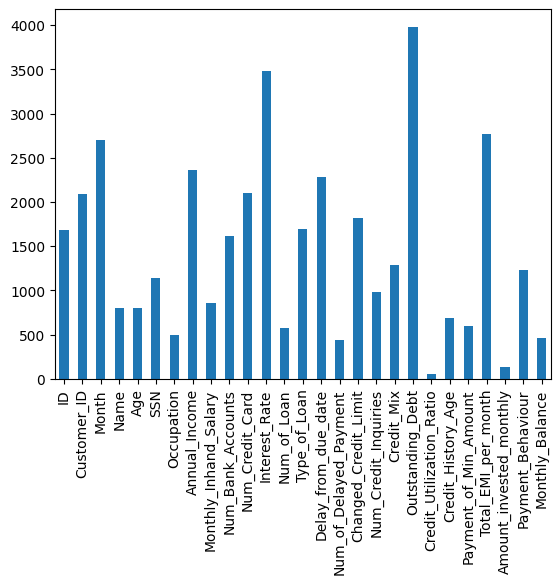

In [ ]:
# 변수 중요도 시각화
val_imp['imp'].plot(kind='bar')

  - 중요도 정보가 데이터 프레임에 있기 때문에 데이터프레임의 정렬 함수를 이용한다.

<Axes: >

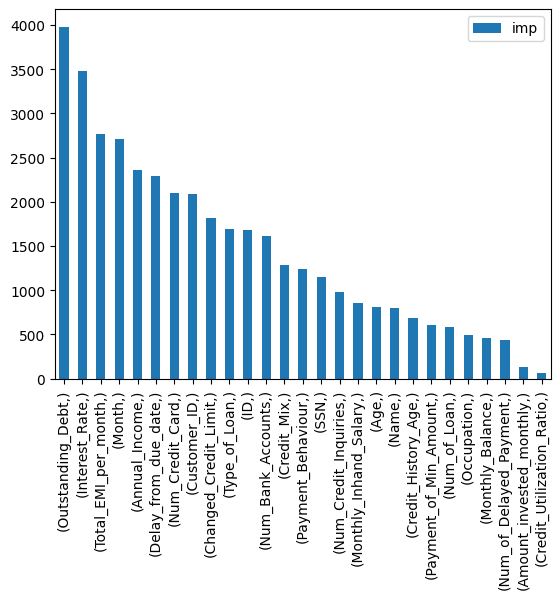

In [ ]:
# 컬럼명을 제대로 알 수 있도록 컬럼명 부여
val_imp.index = [train_data.iloc[:, :-1].columns]

# 정렬한 결과를 이용하여 plot 생성
val_imp.sort_values(by='imp', ascending=False).plot(kind='bar')

# 모델의 저장과 불러오기

In [ ]:
import pickle

In [ ]:
# 저장 객체 정의
save_object = [model, params, valid_data]

In [ ]:
# 저장
with open(file='my_model.pickle', mode='wb') as f:
    pickle.dump(save_object, f)

In [ ]:
# 저장된 객체 불러오기
with open(file='my_model.pickle', mode='rb') as f:
    load_object = pickle.load(f)

In [ ]:
# 저장된 객체 분리
model = load_object[0]
params = load_object[1]
valid_data = load_object[2]

In [ ]:
# 예측
valid_data['pred'] = model.predict(x_valid)
valid_data


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,pred
99900,62688,3754,7,1476,33,12142,5,41329.56,3421.130000,2,...,1245.01,35.367709,0,1,20.553577,10883,5,75877,0,0
99901,62689,3754,5,1476,34,12142,14,41329.56,3421.130000,2,...,1245.01,32.846273,202,1,20.553577,41764,4,44497,0,0
99902,62690,3754,4,1476,34,12142,5,41329.56,3421.130000,2,...,1245.01,39.011550,203,1,20.553577,59852,6,4188,0,0
99903,62691,3754,1,1476,34,12142,5,41329.56,3421.130000,2,...,1245.01,39.866030,194,1,81751.000000,87432,2,76340,0,0
99904,62693,9659,3,10132,39,1232,14,87695.34,7337.945000,2,...,361.68,43.307916,133,1,0.000000,90509,1,96215,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62788,8833,0,6529,25,1009,9,39628.99,3359.415833,4,...,502.38,34.663572,308,1,35.104023,69765,1,76393,1,2
99996,62789,8833,7,6529,25,1009,9,39628.99,3359.415833,4,...,502.38,40.565631,309,1,35.104023,65283,2,78094,1,2
99997,62790,8833,5,6529,25,1009,9,39628.99,3359.415833,4,...,502.38,41.255522,310,1,35.104023,37144,1,79794,1,2
99998,62791,8833,4,6529,25,1009,9,39628.99,3359.415833,4,...,502.38,33.638208,311,1,35.104023,39062,4,44643,2,1


In [ ]:
# 검증
score = f1_score(valid_data['Credit_Score'], valid_data['pred'], average='micro')

print('f1_score = ', score)

f1_score =  0.57


# [실습 결과]

- 본 프로그램은 Baseline 프로그램으로 입력 값에 따른 신용평가 등급을 예측하는 분류 문제다.
- 따라서 신용평가 등급 예측이 실제 등급과 동일해야 한다.
- 인공지능 모델의 예측력을 높이기 위한 프로그래밍을 하여 f1 score 값을 높여 보았다.